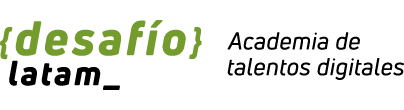

#<center><font color='green'>Solución Desafío - Clasificación de calidad de ramen</font></center>

Carga de bibliotecas


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Paso 1: Carga y exploración de datos
df = pd.read_csv('ramen-ratings.csv')
print(df.shape)
df.head()

(2580, 7)


Review #           Brand   
0      2580       New Touch  \
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars   
0                          T's Restaurant Tantanmen    Cup   Japan  3.75  \
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   India  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

## Analisis de calidad de datos

In [ ]:
def data_quality_analysis(df):
    # Crear un nuevo dataframe para almacenar los resultados
    result_df = pd.DataFrame(columns=['Columna', 'Tipo de dato', 'Valores únicos', 'Valores faltantes'])

    # Obtener información general del dataframe
    columns = df.columns
    data_types = df.dtypes.to_list()
    unique_values = [df[column].nunique() for column in columns]
    missing_values = [df[column].isnull().sum() for column in columns]

    # Llenar el nuevo dataframe con los resultados
    result_df['Columna'] = columns
    result_df['Tipo de dato'] = data_types
    result_df['Valores únicos'] = unique_values
    result_df['Valores faltantes'] = missing_values

    return result_df

# Ejemplo de uso de la función con el dataframe 'df'
analysis_result = data_quality_analysis(df).set_index('Columna')
print(analysis_result)

         Tipo de dato  Valores únicos  Valores faltantes
Columna                                                 
Review #        int64            2580                  0
Brand          object             355                  0
Variety        object            2413                  0
Style          object               7                  2
Country        object              38                  0
Stars          object              51                  0
Top Ten        object              38               2539


In [ ]:
df['Stars'] = df['Stars'].str.replace('Unrated', '-1').astype('float')
df['Stars'] = np.where(df['Stars']==-1, np.nan, df['Stars'])

# Ejemplo de uso de la función con el dataframe 'df'
analysis_result = data_quality_analysis(df).set_index('Columna')
print(analysis_result)

         Tipo de dato  Valores únicos  Valores faltantes
Columna                                                 
Review #        int64            2580                  0
Brand          object             355                  0
Variety        object            2413                  0
Style          object               7                  2
Country        object              38                  0
Stars         float64              42                  3
Top Ten        object              38               2539


In [ ]:
## SE PUEDEN CONSTRUIR MULTIPLES VARIABLES CON LA VARIABLE VARIETY o preprocesar texto, pero no es obligatorio
df['Variety']


0                               T's Restaurant Tantanmen 
1       Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...
2                           Cup Noodles Chicken Vegetable
3                           GGE Ramen Snack Tomato Flavor
4                                         Singapore Curry
                              ...                        
2575    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
2576                       Oriental Style Instant Noodles
2577                                       Tom Yum Shrimp
2578                                 Tom Yum Chili Flavor
2579                                           Miso Ramen
Name: Variety, Length: 2580, dtype: object

## Analisis Exploratorio

In [ ]:
list_cols = ['Style', 'Country', 'Stars', 'Brand']

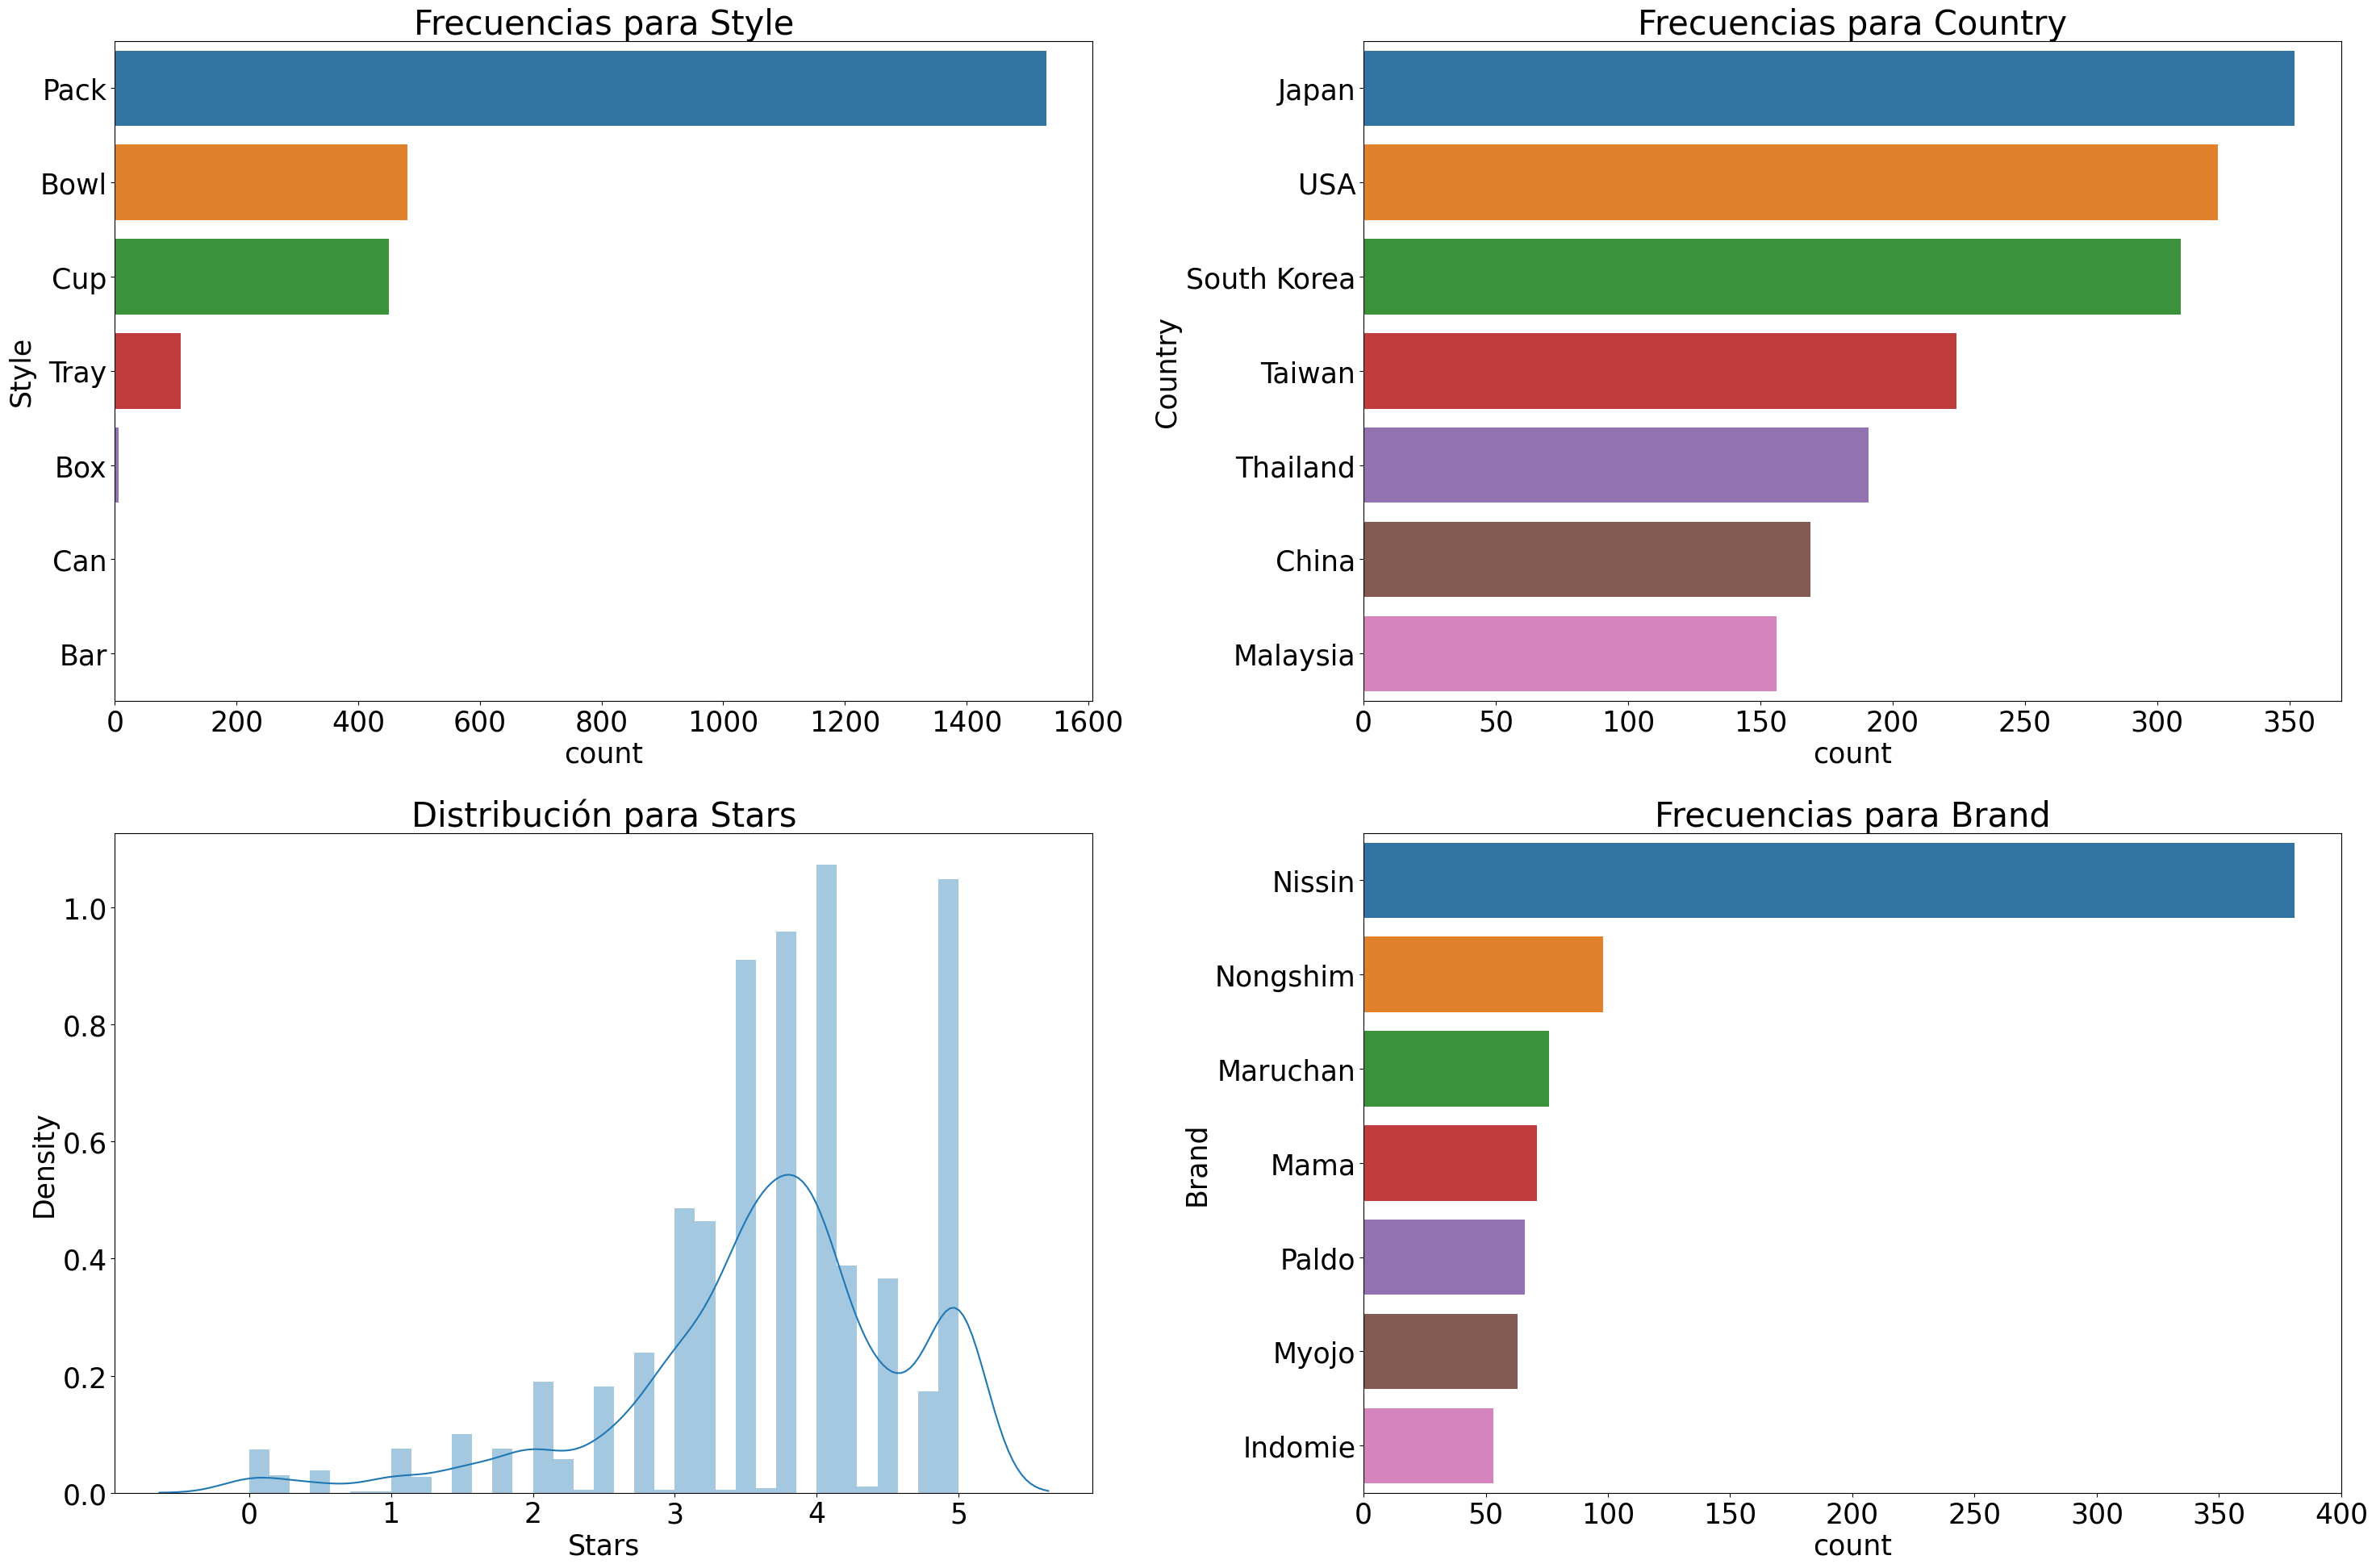

In [ ]:
plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(30, 20))
for n, i in enumerate(list_cols):
    plt.subplot(2, 2, n + 1)
    if analysis_result.loc[i, 'Tipo de dato']=='object':
        sns.countplot(y= df[i], order=df[i].value_counts().iloc[:7].index)
        plt.title('Frecuencias para {}'.format(i))

    else:
        sns.distplot(df[i])
        plt.title('Distribución para {}'.format(i))
    plt.tight_layout()

In [ ]:
## AGRUPAR CATEGORIAS PEQUEÑAS
for i in ['Style', 'Country', 'Brand']:
    df[i] = np.where(df[i].isin(df[i].value_counts().iloc[:7].index), df[i], 'Otros')

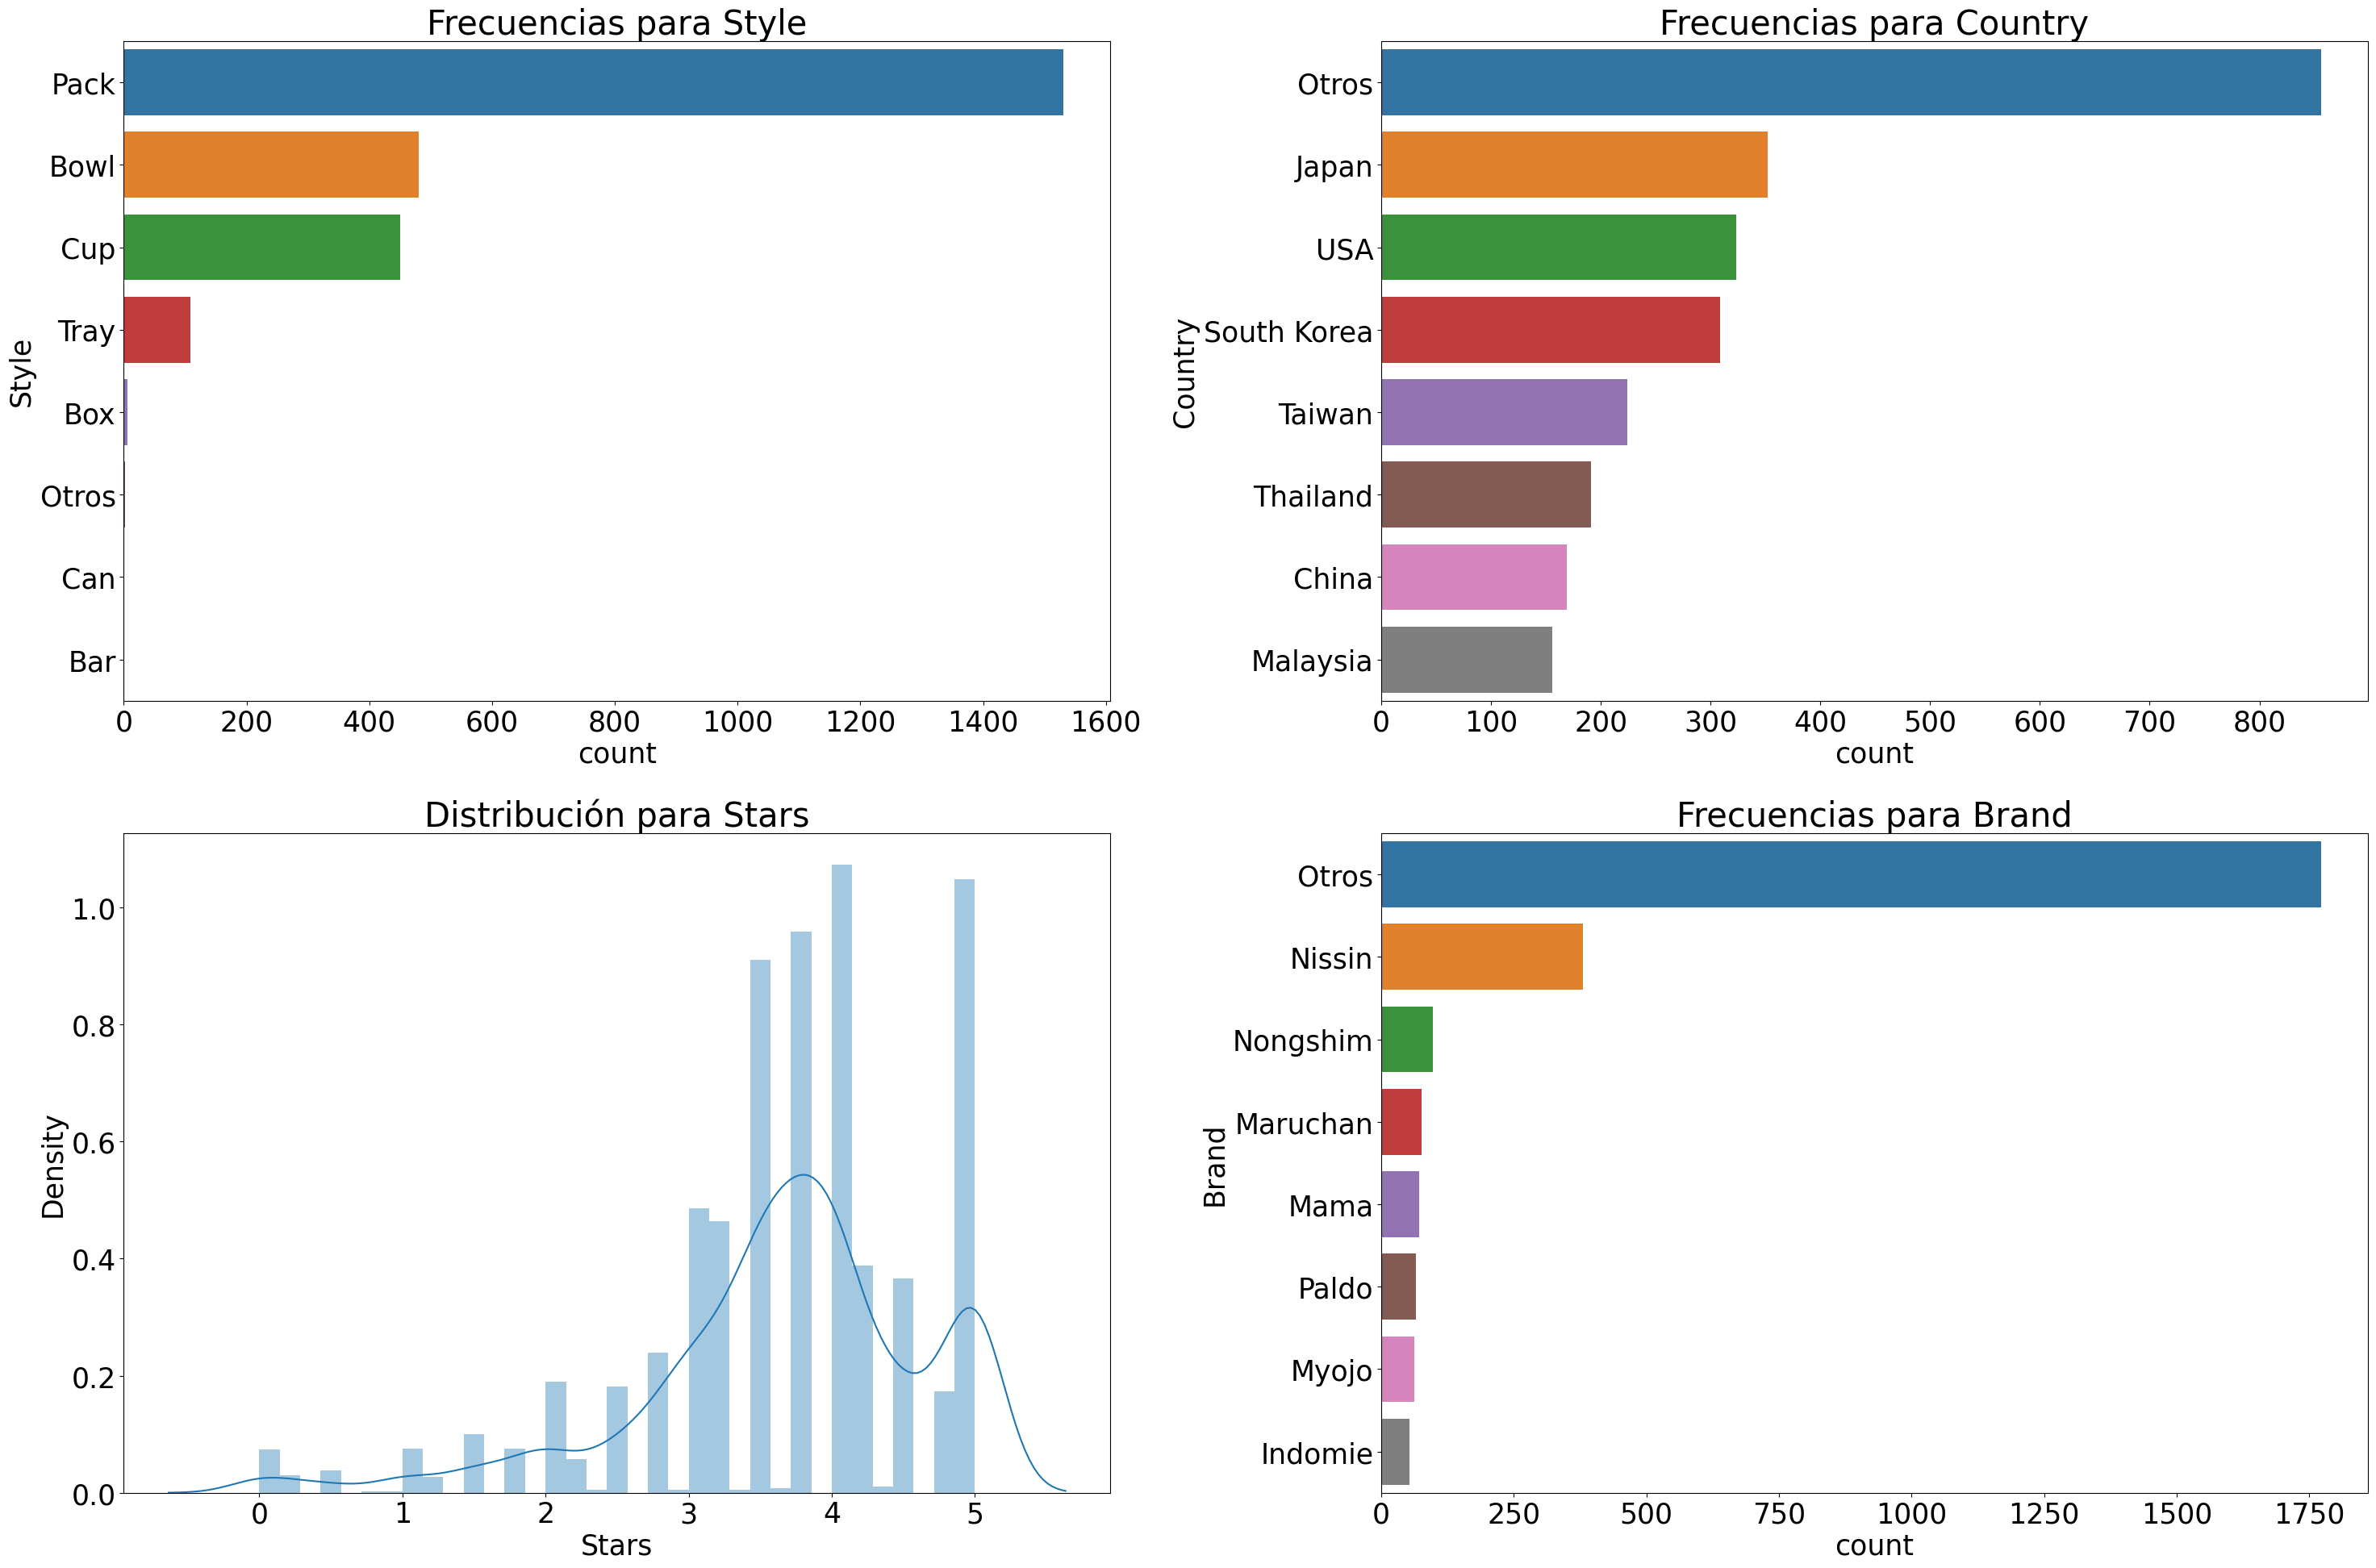

In [ ]:
plt.figure(figsize=(30, 20))
for n, i in enumerate(list_cols):
    plt.subplot(2, 2, n + 1)
    if analysis_result.loc[i, 'Tipo de dato']=='object':
        sns.countplot(y= df[i], order=df[i].value_counts().index)
        plt.title('Frecuencias para {}'.format(i))

    else:
        sns.distplot(df[i])
        plt.title('Distribución para {}'.format(i))
    plt.tight_layout()

In [ ]:
#categorizar variable objetivo
print(df['Stars'].mean())
df['Stars_cat'] = np.where(df['Stars'] > df['Stars'].mean(), 1, 0)

3.6546759798214974


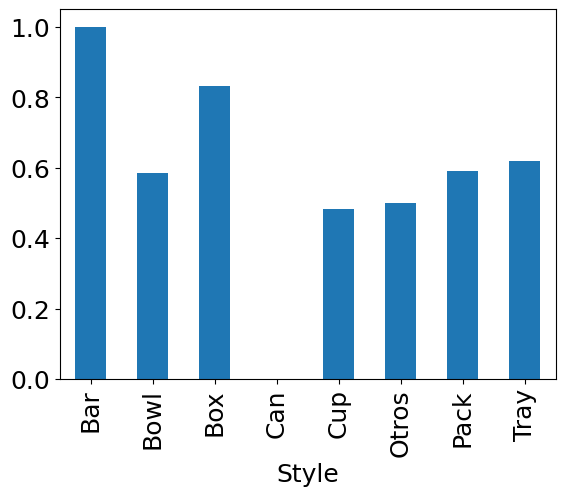

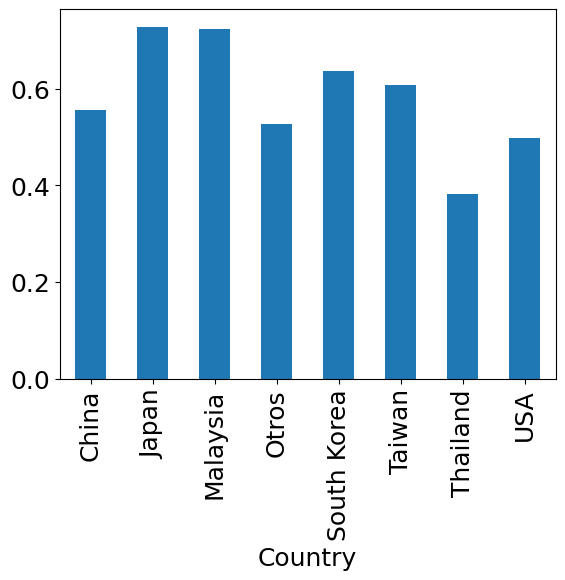

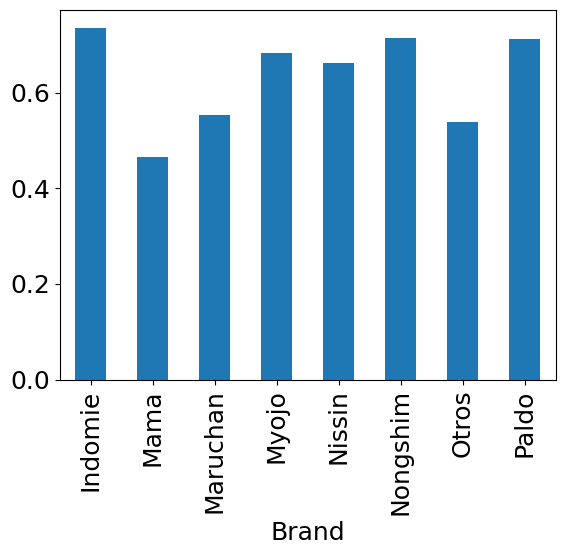

In [ ]:
plt.rcParams.update({'font.size': 18})

for i in ['Style', 'Country', 'Brand']:
    dfi = df.groupby(i).Stars_cat.mean()
    dfi.plot(kind='bar')
    plt.show()


## Transformacion de variables

In [ ]:
df_transform = pd.get_dummies(df.loc[:, ['Brand', 'Style', 'Country', 'Stars_cat']]).astype('int')
df_transform

Stars_cat  Brand_Indomie  Brand_Mama  Brand_Maruchan  Brand_Myojo   
0             1              0           0               0            0  \
1             0              0           0               0            0   
2             0              0           0               0            0   
3             0              0           0               0            0   
4             1              0           0               0            0   
...         ...            ...         ...             ...          ...   
2575          0              0           0               0            0   
2576          0              0           0               0            0   
2577          0              0           0               0            0   
2578          0              0           0               0            0   
2579          0              0           0               0            0   

      Brand_Nissin  Brand_Nongshim  Brand_Otros  Brand_Paldo  Style_Bar  ...   
0                0               0            1            0          0  ...  \
1                0               0            1            0          0  ...   
2                1               0            0            0          0  ...   
3                0               0            1            0          0  ...   
4                0               0            1            0          0  ...   
...            ...             ...          ...          ...        ...  ...   
2575             0               0            1            0          0  ...   
2576             0               0            1            0          0  ...   
2577             0               0            1            0          0  ...   
2578             0               0            1            0          0  ...   
2579             0               0            1            0          0  ...   

      Style_Pack  Style_Tray  Country_China  Country_Japan  Country_Malaysia   
0              0           0              0              1                 0  \
1              1           0              0              0                 0   
2              0           0              0              0                 0   
3              1           0              0              0                 0   
4              1           0              0              0                 0   
...          ...         ...            ...            ...               ...   
2575           0           0              0              0                 0   
2576           1           0              0              0                 0   
2577           1           0              0              0                 0   
2578           1           0              0              0                 0   
2579           1           0              0              0                 0   

      Country_Otros  Country_South Korea  Country_Taiwan  Country_Thailand   
0                 0                    0               0                 0  \
1                 0                    0               1                 0   
2                 0                    0               0                 0   
3                 0                    0               1                 0   
4                 1                    0               0                 0   
...             ...                  ...             ...               ...   
2575              1                    0               0                 0   
2576              0                    0               0                 1   
2577              0                    0               0                 1   
2578              0                    0               0                 1   
2579              0                    0               0                 0   

      Country_USA  
0               0  
1               0  
2               1  
3               0  
4               0  
...           ...  
2575            0  
2576            0  
2577            0  
2578            0  
2579            1  

[2580

## División y entrenamiento

In [ ]:
# División del conjunto de datos en conjuntos de entrenamiento y prueba
X = df_transform.drop('Stars_cat', axis=1)
y = df_transform['Stars_cat']#.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regresion logistica

In [ ]:
logistic_model = LogisticRegression()

param_grid_logistic = {'C': [0.1, 1, 10]}
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5)
grid_search_logistic.fit(X_train_scaled, y_train)
best_logistic_model = grid_search_logistic.best_estimator_

grid_search_logistic.best_params_

{'C': 1}

### SVM

In [ ]:
svm_model = SVC(probability=True)

# Búsqueda de hiperparámetros para SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel':['linear', 'rbf', 'poly']}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)
best_svm_model = grid_search_svm.best_estimator_

grid_search_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

## Evaluacion de los modelos

In [ ]:
# Paso 5: Evaluación de modelos
# Regresión Logística
y_pred_logistic = best_logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test_scaled)[:, 1])

print("Regresión Logística:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_score_logistic)
print("AUC-ROC:", roc_auc_logistic)

Regresión Logística:
Accuracy: 0.6201550387596899
Precision: 0.6897689768976898
Recall: 0.6720257234726688
F1 Score: 0.6807817589576547
AUC-ROC: 0.6064151831228922


<Axes: xlabel='col_0', ylabel='Stars_cat'>

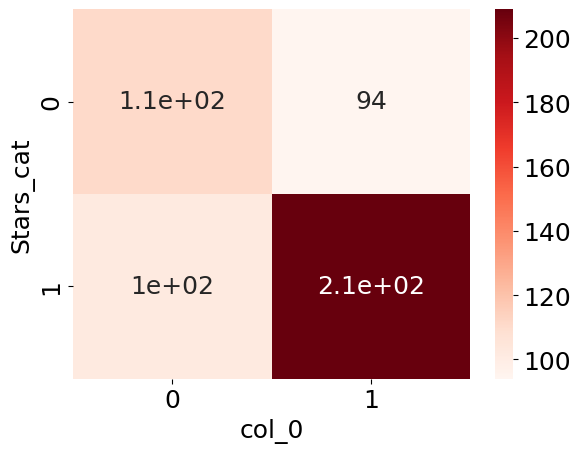

In [ ]:
sns.heatmap(pd.crosstab(y_test, y_pred_logistic), cmap='Reds', annot=True)

In [ ]:
# Support Vector Machine (SVM)
y_pred_svm = best_svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, best_svm_model.predict_proba(X_test_scaled)[:, 1])

print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_score_svm)
print("AUC-ROC:", roc_auc_svm)

Support Vector Machine (SVM):
Accuracy: 0.5949612403100775
Precision: 0.660377358490566
Recall: 0.6752411575562701
F1 Score: 0.6677265500794912
AUC-ROC: 0.6177711552035134


<Axes: xlabel='col_0', ylabel='Stars_cat'>

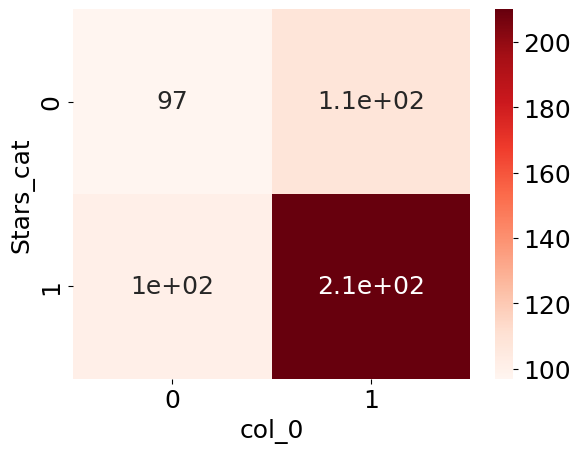

In [ ]:
sns.heatmap(pd.crosstab(y_test, y_pred_svm), cmap='Reds', annot=True)